In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Thesis_Simulation/Small eta/Small alpha

Mounted at /content/gdrive
/content/gdrive/MyDrive/Thesis_Simulation/Small eta/Small alpha


In [3]:
rounds = 100
vehicle_limit = 80
all_routes = [[0, 3], [0, 1], [2, 3], [2, 1]]

In [4]:
record = pd.read_csv(f'Saved_data/Simulation_records/Round_{rounds}.csv')
utility = pd.read_csv(f'Saved_data/Utility_data/Round_{rounds}.csv')

In [5]:
record

Vehicle_label Road_order  Total_time Leading_vehicles  \
0                 0     [0, 1]       68.85       [-999, 14]   
1                 1     [0, 1]       70.40           [0, 0]   
2                 2     [0, 3]      107.20          [1, 19]   
3                 3     [2, 3]       67.75     [-999, -999]   
4                 4     [0, 3]      113.05          [2, 23]   
...             ...        ...         ...              ...   
7995             75     [2, 3]       70.75         [55, 13]   
7996             76     [0, 3]      169.55         [74, 74]   
7997             77     [0, 3]      170.65         [76, 76]   
7998             78     [0, 1]      140.75       [77, -999]   
7999             79     [0, 3]      169.75         [78, 77]   

                 Stopped_time         Stop_while_front  Round_number  
0                      [0, 0]                   [0, 0]             1  
1                      [0, 0]                   [0, 0]             1  
2      [2.499999999999999, 0]   [2.499999999999999, 0]             1  
3                      [0, 0]                   [0, 0]             1  
4     [2.7499999999999982, 0]  [2.7499999999999982, 0]             1  
...                       ...                      ...           ...  
7995                   [0, 0]                   [0, 0]           100  
7996                   [0, 0]                   [0, 0]           100  
7997                   [0, 0]                   [0, 0]           100  
7998                   [0, 0]                   [0, 0]           100  
7999                   [0, 0]                   [0, 0]           100  

[8000 rows x 7 columns]

In [6]:
record['Road_order'] = record.apply(lambda row: ast.literal_eval(row['Road_order']), axis=1)
record["Road_order_label"] = record.apply(lambda row: all_routes.index(row.Road_order), axis=1)

utility['Routes_taken'] = utility.apply(lambda row: ast.literal_eval(row['Routes_taken']), axis=1)

In [7]:
# time_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
# print(time_df.shape)
# display(time_df.head(10))

In [8]:
time_df = pd.pivot_table(record, values='Total_time', 
                         index=['Road_order_label', 'Round_number'], 
                         aggfunc=np.mean).reset_index(drop=False)
time_df.loc[time_df.Road_order_label==1].sort_values('Round_number').Total_time.values

array([114.28043478, 104.24166667, 106.84722222, 108.76190476,
       115.4125    , 129.17      , 109.69375   , 109.42884615,
       118.28275862, 122.89473684, 111.55535714, 113.25862069,
       116.51363636, 120.36857143, 121.51875   , 118.43157895,
       118.62391304, 126.65517241, 125.95      , 121.61206897,
       111.2862069 , 112.97758621, 115.44814815, 109.90833333,
       114.00208333, 118.75      , 113.6390625 , 118.51166667,
       118.86607143, 115.07857143, 115.15      , 120.6453125 ,
       114.38448276, 120.01551724, 120.75217391, 109.78166667,
       120.34375   , 118.72794118, 115.24655172, 119.17272727,
       118.2953125 , 123.02580645, 122.75172414, 115.40769231,
       117.6137931 , 117.57741935, 119.3484375 , 128.87391304,
       123.87241379, 113.89032258, 122.53      , 118.07115385,
       117.94545455, 112.67083333, 117.98214286, 124.27758621,
       122.85      , 115.98571429, 115.30138889, 123.45428571,
       119.48714286, 118.742     , 127.00517241, 118.08

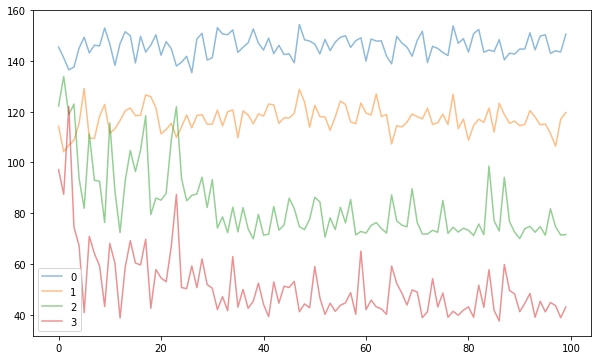

In [9]:
# Changes in average time needed to go through each route over time
plot_route_time = [[], [], [], []]

for i in range(4):
    times = time_df.loc[time_df.Road_order_label==i].sort_values('Round_number').Total_time.values
    plot_route_time[i]=times
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_time[i], label=str(i), alpha=0.5)
    
plt.legend()

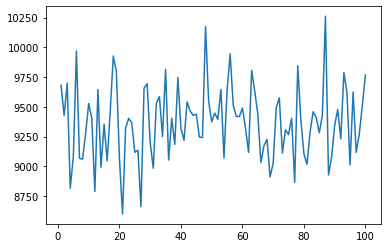

In [10]:
time_df2 = pd.pivot_table(record, values='Total_time', index='Round_number', aggfunc=np.sum).reset_index(drop=False)
plt.plot(time_df2.Round_number, time_df2.Total_time)

In [11]:
time_df2.Total_time[-20:].mean()

9395.194999999867

In [12]:
utility

Vehicle_label                                          Utilities  \
0               0  [-3.306929402342955, -2.9317374878961724, -2.2...   
1               1  [-2.450899284905896, -3.5022061153255817, -1.9...   
2               2  [-3.6715384230383563, -2.5308282826072284, -2....   
3               3  [-2.2364600663659457, -2.639724529395342, -1.4...   
4               4  [-2.890027222594757, -1.7140924780936972, -2.0...   
..            ...                                                ...   
75             75  [-0.8700246788327461, -1.578717554052071, -4.4...   
76             76  [-1.453507331722711, -2.2488591959944455, -4.5...   
77             77  [-1.784508274820148, -1.1681150979044053, -4.2...   
78             78  [-1.662758469616545, -0.6130448537420139, -2.9...   
79             79  [-1.5718933339835495, -1.5686248575519979, -1....   

                                        Probabilities  \
0   [0.11503568873259183, 0.1674080644239648, 0.34...   
1   [0.2132818930458465, 0.07453791348998777, 0.34...   
2   [0.08276365484591056, 0.2589666151401982, 0.31...   
3   [0.16317587674549627, 0.10902357622857171, 0.3...   
4   [0.11085348173886352, 0.35929511190501473, 0.2...   
..                                                ...   
75  [0.647604225170951, 0.31880730825488135, 0.017...   
76  [0.6501974675728012, 0.2935136802008692, 0.030...   
77  [0.3241636257776926, 0.6004273087959004, 0.027...   
78  [0.23714338650463465, 0.6774790165659046, 0.06...   
79  [0.24818641645574463, 0.24899893503413298, 0.2...   

                                         Routes_taken     Gamma       Eta  
0   [1, 2, 3, 0, 1, 0, 2, 1, 1, 3, 1, 2, 3, 3, 3, ...  4.815470  0.587756  
1   [1, 3, 2, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, ...  4.485662  0.523413  
2   [0, 1, 2, 3, 1, 0, 3, 2, 3, 2, 3, 2, 3, 1, 2, ...  5.384442  0.613445  
3   [2, 3, 0, 1, 2, 1, 2, 2, 0, 1, 0, 3, 2, 3, 0, ...  5.328708  0.318226  
4   [0, 3, 1, 2, 3, 3, 1, 0, 3, 0, 1, 3, 1, 2, 2, ...  4.536273  0.546436  
..                                                ...       ...       ...  
75  [2, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, ...  4.349203  0.531519  
76  [1, 0, 2, 3, 0, 2, 3, 0, 2, 0, 0, 0, 0, 3, 0, ...  4.460154  0.505991  
77  [3, 2, 0, 1, 3, 2, 0, 1, 1, 3, 1, 1, 1, 1, 0, ...  4.583035  0.418222  
78  [0, 3, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, ...  5.643388  0.308640  
79  [1, 3, 0, 2, 2, 1, 2, 2, 3, 3, 1, 1, 0, 2, 0, ...  4.966628  0.373250  

[80 rows x 6 columns]

In [13]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# prob_df = pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))
# print(prob_df.shape)
# display(prob_df.head(10))

In [14]:
route_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
print(route_df.shape)
display(route_df.head(10))

(80, 100)


0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0   1   2   3   0   1   0   2   1   1   3  ...   1   2   2   3   3   3   1   
1   1   3   2   0   0   0   3   3   3   3  ...   3   2   1   3   2   2   3   
2   0   1   2   3   1   0   3   2   3   2  ...   1   2   3   2   3   1   1   
3   2   3   0   1   2   1   2   2   0   1  ...   2   2   2   1   2   2   0   
4   0   3   1   2   3   3   1   0   3   0  ...   1   0   2   0   1   3   3   
5   1   0   2   3   0   0   2   0   2   3  ...   2   3   2   0   3   0   3   
6   1   2   0   3   2   2   3   0   0   3  ...   0   2   1   2   3   2   3   
7   0   1   2   3   3   0   0   2   2   0  ...   1   1   3   2   2   2   0   
8   3   2   0   1   3   0   3   2   1   1  ...   3   3   3   3   3   3   3   
9   3   2   1   0   0   3   1   1   1   2  ...   3   3   3   2   2   2   2   

   97  98  99  
0   1   2   0  
1   1   3   3  
2   1   2   0  
3   2   3   2  
4   1   1   1  
5   3   0   2  
6   3   0   1  
7   3   3   3  
8   3   3   3  
9   0   1   0  

[10 rows x 100 columns]

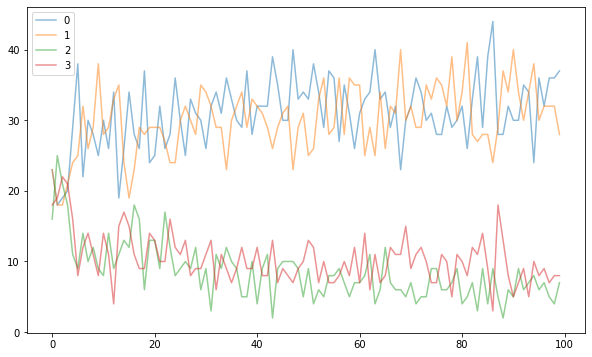

In [15]:
# Changes in number of vehicles that took the route over time
plot_route_l = [[], [], [], []]

for i in range(4):
    for j in range(rounds):
        plot_route_l[i].append(len(route_df.loc[route_df[j]==i]))
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_l[i], label=str(i), alpha=0.5)
    
plt.legend()

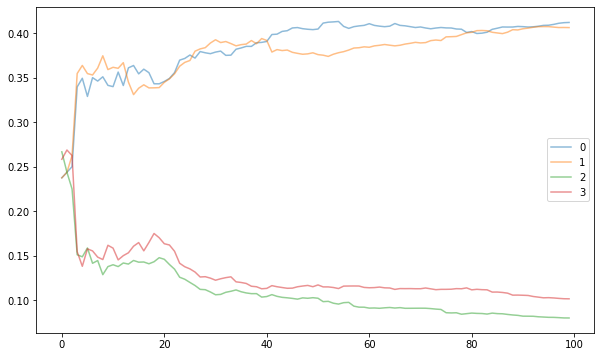

In [16]:
# Changes in vehicles' probabilities of selecting each route over time
plot_prob_l = [[], [], [], []]

for r in range(1, rounds+1):
    df = pd.read_csv(f'Saved_data/Utility_data/Round_{r}.csv')
    df['Probabilities'] = df.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
    for i in range(4):
        avg_prob = pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()
        plot_prob_l[i].append(avg_prob)
        
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_prob_l[i], label=str(i), alpha=0.5)
    
plt.legend()

In [17]:
utility

Vehicle_label                                          Utilities  \
0               0  [-3.306929402342955, -2.9317374878961724, -2.2...   
1               1  [-2.450899284905896, -3.5022061153255817, -1.9...   
2               2  [-3.6715384230383563, -2.5308282826072284, -2....   
3               3  [-2.2364600663659457, -2.639724529395342, -1.4...   
4               4  [-2.890027222594757, -1.7140924780936972, -2.0...   
..            ...                                                ...   
75             75  [-0.8700246788327461, -1.578717554052071, -4.4...   
76             76  [-1.453507331722711, -2.2488591959944455, -4.5...   
77             77  [-1.784508274820148, -1.1681150979044053, -4.2...   
78             78  [-1.662758469616545, -0.6130448537420139, -2.9...   
79             79  [-1.5718933339835495, -1.5686248575519979, -1....   

                                        Probabilities  \
0   [0.11503568873259183, 0.1674080644239648, 0.34...   
1   [0.2132818930458465, 0.07453791348998777, 0.34...   
2   [0.08276365484591056, 0.2589666151401982, 0.31...   
3   [0.16317587674549627, 0.10902357622857171, 0.3...   
4   [0.11085348173886352, 0.35929511190501473, 0.2...   
..                                                ...   
75  [0.647604225170951, 0.31880730825488135, 0.017...   
76  [0.6501974675728012, 0.2935136802008692, 0.030...   
77  [0.3241636257776926, 0.6004273087959004, 0.027...   
78  [0.23714338650463465, 0.6774790165659046, 0.06...   
79  [0.24818641645574463, 0.24899893503413298, 0.2...   

                                         Routes_taken     Gamma       Eta  
0   [1, 2, 3, 0, 1, 0, 2, 1, 1, 3, 1, 2, 3, 3, 3, ...  4.815470  0.587756  
1   [1, 3, 2, 0, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, ...  4.485662  0.523413  
2   [0, 1, 2, 3, 1, 0, 3, 2, 3, 2, 3, 2, 3, 1, 2, ...  5.384442  0.613445  
3   [2, 3, 0, 1, 2, 1, 2, 2, 0, 1, 0, 3, 2, 3, 0, ...  5.328708  0.318226  
4   [0, 3, 1, 2, 3, 3, 1, 0, 3, 0, 1, 3, 1, 2, 2, ...  4.536273  0.546436  
..                                                ...       ...       ...  
75  [2, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, ...  4.349203  0.531519  
76  [1, 0, 2, 3, 0, 2, 3, 0, 2, 0, 0, 0, 0, 3, 0, ...  4.460154  0.505991  
77  [3, 2, 0, 1, 3, 2, 0, 1, 1, 3, 1, 1, 1, 1, 0, ...  4.583035  0.418222  
78  [0, 3, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, ...  5.643388  0.308640  
79  [1, 3, 0, 2, 2, 1, 2, 2, 3, 3, 1, 1, 0, 2, 0, ...  4.966628  0.373250  

[80 rows x 6 columns]

In [18]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()

In [19]:
plot_eta_prob = [[], [], [], []]

utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

for i in range(4):
    plot_eta_prob[i]=pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [20]:
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [21]:
# len(utility.Eta.values), len(plot_eta_prob[1])

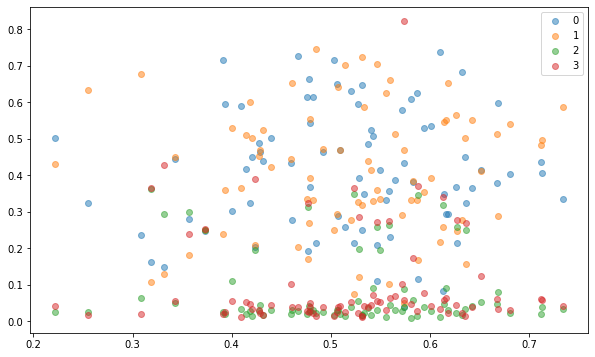

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.scatter(utility.Eta.values, plot_eta_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

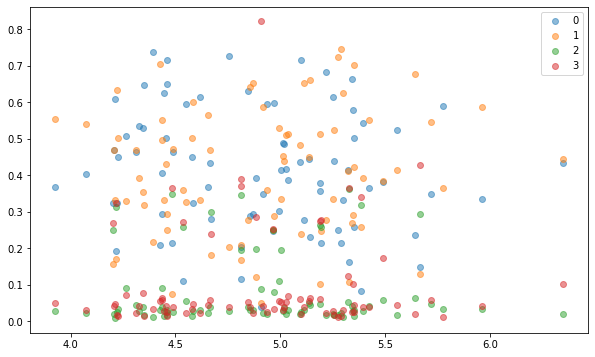

In [23]:
plot_gamma_prob = plot_eta_prob

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.scatter(utility.Gamma.values, plot_gamma_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

In [24]:
summary = pd.read_csv('Saved_data/Simulation_records/Summary.csv')

In [25]:
summary.head(20)

Vehicle_label  Road_order  Caused_delay  Count  Total_time
0               0           0      1.167857     14   99.750000
1               0           1      0.827273     22   69.625000
2               0           2      0.000000     24   67.750000
3               0           3      0.000000     40   36.400000
4               1           0      0.637500     12  101.583333
5               1           1      1.862500     12   71.337500
6               1           2      0.000000     35   68.977143
7               1           3      0.000000     41   37.297561
8               2           0      1.480000     15  104.440000
9               2           1      0.488636     22   73.511364
10              2           2      0.000000     33   70.236364
11              2           3      0.000000     30   38.291667
12              3           0      0.880952     21  103.388095
13              3           1      1.325000     14   74.796429
14              3           2      0.000000     34   70.176471
15              3           3      0.000000     31   38.622581
16              4           0      0.908824     17  103.458824
17              4           1      0.286667     30   74.130000
18              4           2      0.000000     21   71.392857
19              4           3      0.000000     32   38.889062